In [1]:
# Q1.

# Clustering Concept:
# It is a technique that involves grouping similar data points together into clusters.
# Data points within the same cluster are more similar to each other than to those in other clusters.
# Discover inherent structures or patterns in the data without the need for labeled outcomes.

# Examples:
# Customer Segmentation: Grouping customers based on purchasing behavior or demographics.
# Document Clustering: Organizing documents into topics or themes for information retrieval.

In [2]:
# Q2.

# DBSCAN
# Density based clustering algorithm.
# Identifies clusters based on density while marking points in low-density regions as outliers.
# Automatically detects number of clusters.

# Differences 
# K-Means: Requires predefined number of clusters.
# Hierarchical Clustering: Constructs hierarchy, may be computationally intensive. 

In [3]:
# Q3.

# Epsilon: Determine using the elbow method or k-distance plot.
# Minimum Points: Often chosen based on domain knowledge or trial and error.

In [4]:
# Q4.

# DBSCAN marks points in low-density regions as outliers, as they don't belong to any cluster.

In [5]:
# Q5.

# DBSCAN: Density-based clustering, does not require predefined number of clusters, suitable for non-linear shapes.
# K-means: Partitioning clustering, requires predefined number of clusters, assumes spherical clusters.

In [6]:
# Q6.

# Yes, DBSCAN can be applied to datasets with high-dimensional feature spaces.
# Challenges
    # Curse of Dimensionality: Increased computational complexity.
    # Difficulty in Visualization: Harder to interpret results in high-dimensional space.
    # Parameter Sensitivity: Sensitivity to epsilon and minimum points parameters.

In [7]:
# Q7.

# DBSCAN adapts to varying densities by considering regions of high density as clusters and regions of low density as noise or outliers.

In [8]:
# Q8.

# Silhouette Score: Measures cohesion and separation of clusters.
# Adjusted Rand Index: Compares clusterings to ground truth labels.
# Davies-Bouldin Index: Measures compactness and separation of clusters.

In [9]:
# Q9.

# No, DBSCAN clustering is primarily an unsupervised learning algorithm and is not typically used for semi-supervised learning tasks.

In [11]:
# Q10.

# DBSCAN handles noise in datasets by designating points in low-density regions as outliers or noise points.
# DBSCAN marks points with missing values as noise.
# It can tolerate a certain amount of noise but may struggle with high levels of noise.

In [38]:
# Q11.

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
%matplotlib inline

In [17]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

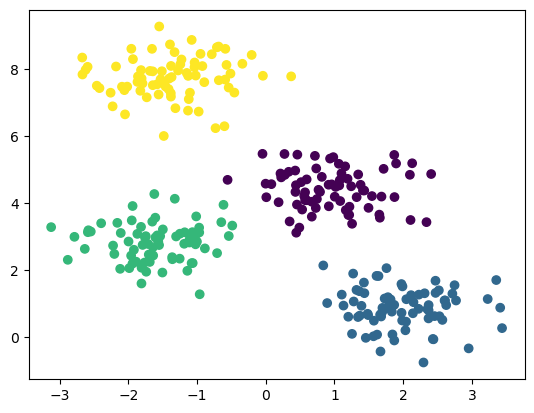

In [18]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [21]:
scaler = StandardScaler()

In [22]:
X_std = scaler.fit_transform(X)

In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

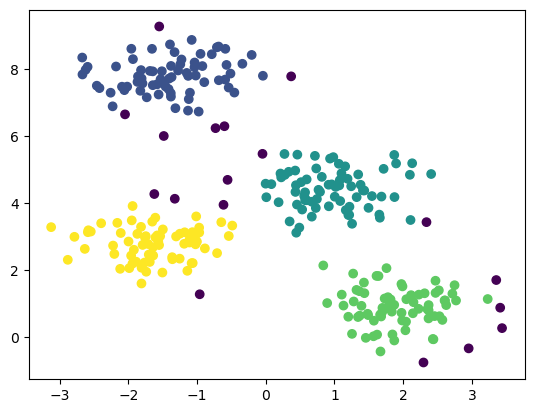

In [25]:
plt.scatter(X[:, 0], X[:, 1], c = labels)

In [26]:
from sklearn.metrics import silhouette_score

In [34]:
eps_values = np.arange(0.1, 1.0, 0.12)
min_values = np.arange(2, 10)

In [35]:
silhouette_coefficients = np.zeros((len(eps_values), len(min_values)))

In [36]:
for i, epsilon in enumerate(eps_values):
    for j, min_sample_values in enumerate(min_values):
        dbscan = DBSCAN(eps= epsilon, min_samples=min_sample_values)
        labels = dbscan.fit_predict(X_std)
        
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(X_std, labels)
            silhouette_coefficients[i, j] = silhouette_avg
        else:
            silhouette_coefficients[i, j] = np.nan

In [37]:
silhouette_coefficients

array([[-0.01437766, -0.07069325, -0.13179723, -0.25144297, -0.37472657,
        -0.48736221, -0.12037635, -0.12613123],
       [ 0.24300463,  0.53811496,  0.53811496,  0.53046277,  0.47817312,
         0.51192408,  0.49027666,  0.46476287],
       [ 0.65655915,  0.65655915,  0.65655915,  0.58931324,  0.63558654,
         0.62666238,  0.62632981,  0.63456704],
       [ 0.47021947,  0.47021947,  0.47021947,  0.47021947,  0.47021947,
         0.47021947,  0.47021947,  0.5226675 ],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan]])

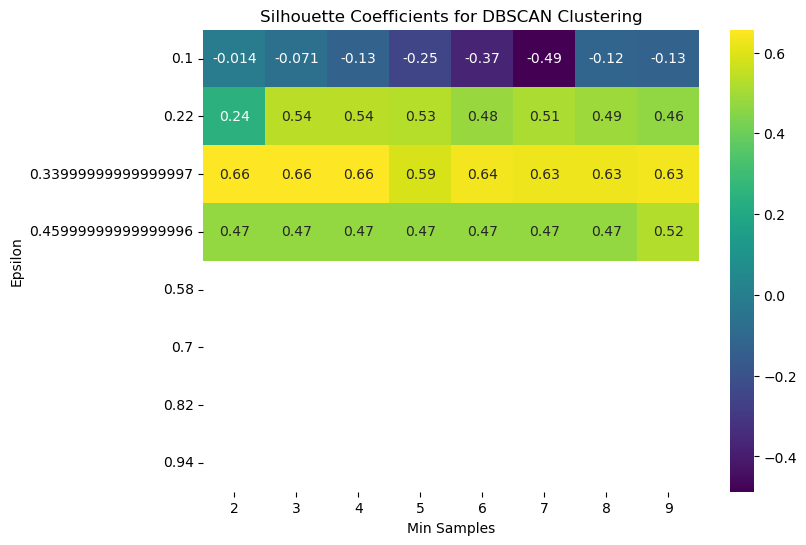

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(silhouette_coefficients, annot=True, cmap= 'viridis', xticklabels=min_values, yticklabels=eps_values)
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.title('Silhouette Coefficients for DBSCAN Clustering')
plt.show()